In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def diff(xi, f, n):
    """
    xi: сетка(всегда одинакова)
    f: список предыдущих разд разностей
    n: порядок следующей разд разности
    Возвращает список следующих разделенных разностей
    """
    new_f = []
    for j in range(len(f)-1):
        d = (f[j+1] - f[j]) / (xi[j+n] - xi[j])
        new_f.append(d)
    return new_f

In [11]:
def newton(xi, fi):
    """
    xi: сетка
    fi: значения функции на узлах сетки
    Возвращает список коэффициентов в формуле метода Ньютона
    """
    n = 1
    f = fi
    koefs = []
    while len(f) > 1:
        f = diff(xi, f, n)
        n +=1
        koefs.append(f[0])
    return koefs

In [12]:
def inter_polynom_newt(xi, fi, k, t):
    """
    xi: сетка
    fi: значения функции на узлах сетки
    k: список коэффициентов в формуле метода Ньютона
    t: некоторый аргумент
    Возвращает значение интерполянта Ньютона на аргументе t
    """
    a = fi[0]
    p = 1
    for j in range(len(k)):
        p *= (t - xi[j])
        a += k[j] * p
    return a

## Пример 
(с семинара)

In [13]:
xi = [2, 3, 4, 5]
fi = [7, 5, 8, 7]

In [14]:
k = newton(xi, fi)
k

[-2.0, 2.5, -1.5]

In [15]:
t = np.linspace(np.min(xi), np.max(xi), 100)
p = [inter_polynom_newt(xi, fi, k, ti) for ti in t]

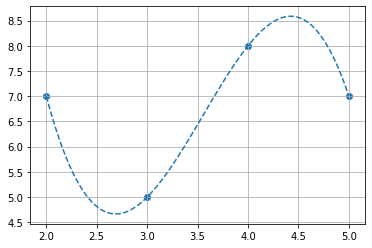

In [16]:
plt.scatter(xi, fi)
plt.plot(t, p, linestyle='--')
plt.grid()

## Задача 6.9.32

In [17]:
xi = np.array([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000], dtype=float)
fi = np.array([92228496, 106021537, 123202624, 132164569,
          151325798, 179323175, 203211926, 226545805,
          248709873, 281421906], dtype=float)

In [18]:
k = newton(xi, fi)
k

[1379304.1,
 16940.229999999992,
 -1934.531333333333,
 125.10672500000001,
 -4.150598,
 0.08056541666666665,
 -0.0007564852777777771,
 -7.564675347222239e-06,
 5.099328042328045e-07]

In [19]:
t = np.linspace(np.min(xi), np.max(xi), 100)
p = [inter_polynom_newt(xi, fi, k, ti) for ti in t]

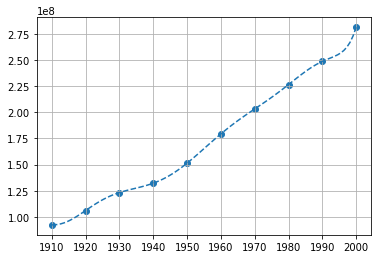

In [20]:
fig, axes = plt.subplots()
axes.scatter(xi, fi)
axes.plot(t, p, linestyle='--')
axes.set_xticks(list(range(1910, 2010, 10)))
axes.grid()

Продолжим график

In [21]:
t = np.linspace(np.min(xi), 2010, 100)
p = [inter_polynom_newt(xi, fi, k, ti) for ti in t]

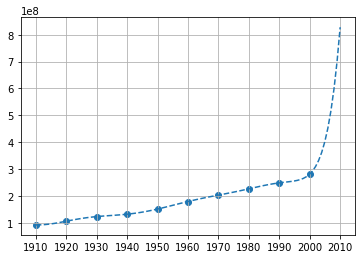

In [22]:
fig, axes = plt.subplots()
axes.scatter(xi, fi)
axes.plot(t, p, linestyle='--')
axes.set_xticks(list(range(1910, 2020, 10)))
axes.grid()

In [23]:
# значение полинома в точке 2010
inter_polynom_newt(xi, fi, k, 2010)

827906509.0000029